<a href="https://colab.research.google.com/github/karthikeyanmuthurangam/extensive-vision-ai-program/blob/master/Session3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

## Install Keras



*   Keras is a Python Deep Learning library
*   Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Import necessary packages


### Numpy

*  NumPy is the fundamental package for scientific computing with Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

### Keras

*Layers*


* Layers packages implements the necessary neural networks operations like Convolution, Pooling, Normalization etc.,

*Models*

*   Model groups layers into an object with training and inference features.
*   supports two types of models: the Sequential model, and the Model class used with the functional API.


*Utils*

* Contains utility functions needed for creating a neural network

*DataSets*

* Has in-built famous datasets to get started quickly on the Deep Learning


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets


*   MNIST dataset contains 60000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images
*   load_data() returns a tuple containing the training and test data and its corresponding labels



In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Visualize Image


*   Plot one of the training image using the MatPlot library

(60000, 28, 28)


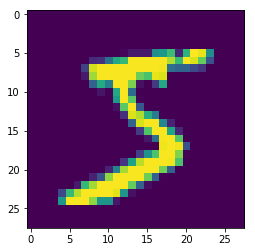

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Image Reshaping

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Normalization



*   Normalization refers to normalizing the data dimensions so that they are of approximately the same scale
* MNIST dataset contains grayscale image where pixel value ranges from 0 to 255. Normalize the input by dividing each pixel by 255, this will make the result bounded between 0 and 1


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Slicing operator (:) slices all Y_train elements till the 10 element, prints binary class matrix for respective y_train elements
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Convolution Neural Network


### Sequential Model

 A Sequential Model is used to add a list of many linear stacks of layers
 
### Convolution Block
Convolution block consists of Convolution2D, BatchNormalization, Dropouts & Activation layers


#### Convolution2D
* A Convolution2D operator convolves the filters with 2D inputs.
* First layer of the convolution2D should have input shape and the input shape of the subsequent layers are identified from the output shape of the previous layers
* Only 3x3 kernels/filters are used for all the convolutions as it is computionally less expensive because of lower number of parameters


#### Batch Normalization
* Batch Normalization is used to normalize the input as well as hidden layers by adjusting the scaling of the activations. 
* It also helps in avoiding the vanishing and exploding gradient problems and regularize the network such that it is easier to generalize
* Batch Normalization is typically placed between the linear (Convolution) and non-linear (Activation) layers

#### Dropouts
* Dropouts are used to avoid overfitting on the training data and helps in generalizing.


#### Activation functions
Activation functions are used to determine whether the neurons should be activated or not based on the value

##### RELU
* RELU (Rectified Linear Unit) activation functions supresses all the negative values of neurons

##### Softmax
* Softmax activation function calculate the probabilities of each target class over all possible target classes.  The range will 0 to 1, and the sum of all the probabilities will be equal to one.

### Transition Block
Transition block consists of Max Pooling & 1x1 convolution

#### Maxpooling
* MaxPooling is a downsampling technique which filters the less important features and passes the most important to the following convultional layer.

#### 1x1
* 1x1  performs a weighted sum of the channels, so it decides to pick a particular feature which defines the part of the object but not backgrounds 
* It is computationally less expensive
* It helps in Channel reduction as well

### Flatten

* Flatten layer reduces the dimension of the output layer to a single dimension.

In [0]:
from keras.layers import Activation
model = Sequential()

dropout = 0.1

# Convolution Block - 1
model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1), bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(32, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 1
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, activation='relu', bias=False))
model.add(Dropout(dropout))

# Convolution Block - 2
model.add(Convolution2D(24, 3,3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Convolution2D(16, 3, 3, bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Transition Block - 2
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(10, 1, activation= 'relu', bias=False))
model.add(Dropout(dropout))

model.add(Convolution2D(10, 3, 3))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API:

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9216      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

## Configures the model for training 



*   categorical_crossentropy loss function is used as the target has 10 classes
*   only accuracy 'metrics' is evaluated by the model during the training and testing

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Model Training

In [0]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=30, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.8545 - acc: 0.7215
Epoch 2/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.2659 - acc: 0.9053
Epoch 3/30
60000/60000 [==============================] - 5s 79us/step - loss: 0.2006 - acc: 0.9246
Epoch 4/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.1725 - acc: 0.9327
Epoch 5/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.1556 - acc: 0.9378
Epoch 6/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.1447 - acc: 0.9395
Epoch 7/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.1357 - acc: 0.9428
Epoch 8/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.1299 - acc: 0.9440
Epoch 9/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.1216 - acc: 0.9468
Epoch 10/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.1211 - acc: 0.946

## Model Evaluation

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.01993444280837648, 0.9941]


## Model Prediction

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.26034138e-10 3.21914584e-09 7.31421750e-08 2.07704272e-08
  4.96476228e-11 1.87992577e-09 5.85089296e-14 9.99999881e-01
  3.04122905e-09 2.89354918e-09]
 [3.14444078e-05 4.40197664e-06 9.99957204e-01 1.80778237e-08
  4.05127416e-08 4.81345297e-10 6.43628027e-06 3.35872663e-08
  3.07728499e-07 3.22519256e-08]
 [1.56364891e-07 9.99992728e-01 8.83386178e-07 3.66364361e-08
  1.67096323e-06 2.50910546e-07 1.50000017e-06 2.52718246e-06
  2.00023095e-07 6.71094611e-08]
 [9.99947667e-01 1.14270282e-09 1.21848336e-06 3.54315603e-07
  1.70193495e-08 3.53789886e-07 7.27620886e-07 3.19884315e-08
  4.90927341e-05 5.94180108e-07]
 [3.43259954e-09 9.82223796e-08 6.42517435e-08 2.70940337e-09
  9.99998450e-01 1.17206360e-08 3.62953017e-07 5.17952081e-08
  3.44190283e-07 7.04378181e-07]
 [4.27647784e-08 9.99997377e-01 3.32045346e-07 8.29317770e-09
  3.32594254e-07 2.67021658e-08 3.87264095e-07 1.25545864e-06
  4.65620751e-08 2.18126885e-07]
 [1.66940872e-09 1.09587081e-05 2.75993870e-07 3.38411382e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

## Visualize the filters of the Convolution layers

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


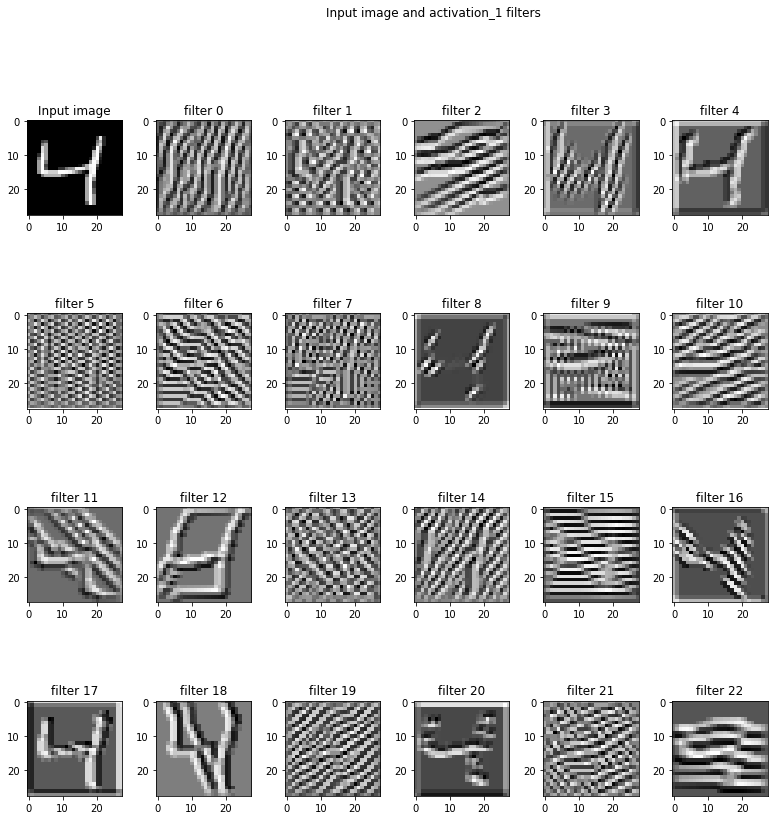

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_38'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

print(Y_train[2])
vis_img_in_filter(np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 'activation_1')